# The Newton-Raphson Method
Calculate the next estimate of the root from an initial guesses  
Works by repeatedly taking the linear approximation of the function using its derivative

## Algorithm 

- Input:
    - Function f(x)
    - Its derivative f′(x)
    - Initial guess x<sub>0</sub>(starting point for the iteration).
    - Tolerance level 

- Iterative steps:
    - x<sub>i+1</sub> = x<sub>i</sub> - f(x<sub>i</sub>)/(f'(x<sub>i</sub>)  
    - The absolute relative error can be calculated as e = |x<sub>i+1</sub> - x<sub>i</sub>|/|x<sub>i+1</sub>|
    - Increment i and set the new value of the estimate and the old value for the next iteration until the tolerance level is crossed
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the function
def f(x):
    return x**2 - 2

In [3]:
# Define the derivative of the function
def f_(x):
    return 2*x

In [4]:
# Set x_0
# We want the positive root of this function, i.e. sqrt(2) which lies between 1 and 2
x_0 = 1.0

In [5]:
result = {"Iteration":[0], "x_i-1":[x_0], "x_i":[], "f(x_i)":[], "Absolute error %":[]}

In [6]:
# Define the algorithm
def newtonraphson_method(x_i_1):
    x_i = x_i_1 - f(x_i_1)/f_(x_i_1)
    e = abs((x_i - x_i_1)/x_i)
    return x_i, e

In [7]:
x_1, e = newtonraphson_method(x_0)
result["x_i"].append(x_1)
result["f(x_i)"].append(f(x_1))
result["Absolute error %"].append(e)

In [8]:
x_i_1 = x_0
x_i = x_1
i = 0
while (i==0 or abs(x_i - x_i_1)>1e-7):   
    x_i_1 = x_i
    x_i, e = newtonraphson_method(x_i_1)
    
    result["Iteration"].append(i+1)
    result["x_i-1"].append(x_i_1)
    result["x_i"].append(x_i)
    result["f(x_i)"].append(f(x_i))
    result["Absolute error %"].append(e)

    if f(x_i)==0:
        print("Root found:", x_i)
        break
     
    i+=1    

In [9]:
df = pd.DataFrame.from_dict(result)
print(df)

   Iteration     x_i-1       x_i        f(x_i)  Absolute error %
0          0  1.000000  1.500000  2.500000e-01      3.333333e-01
1          1  1.500000  1.416667  6.944444e-03      5.882353e-02
2          2  1.416667  1.414216  6.007305e-06      1.733102e-03
3          3  1.414216  1.414214  4.510614e-12      1.501824e-06
4          4  1.414214  1.414214  4.440892e-16      1.127640e-12


In [10]:
print(f"Final Result : {x_i} with |Error|% : {e}")

Final Result : 1.4142135623730951 with |Error|% : 1.1276404038266872e-12


In [11]:
print(x_i - x_i_1) # Confirming that we have satisfied the tolerance criterion
print(abs((x_i - x_i_1))>1e-7)

-1.5947243525715749e-12
False


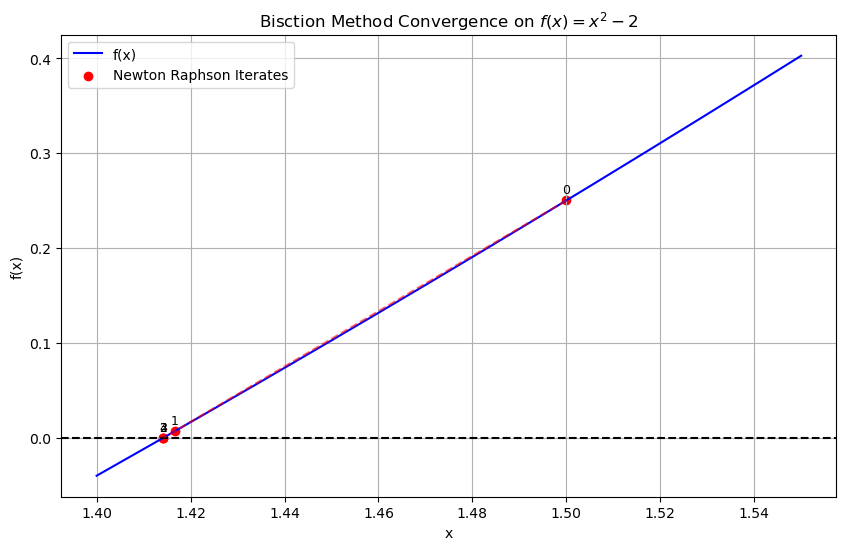

In [16]:
# Convert x_i+1 and f(x_i+1) to numpy arrays for plotting
x_vals = np.array(df["x_i"])
y_vals = np.array(df["f(x_i)"])

# Plot the function curve
x_plot = np.linspace(1.4, 1.55, 500)
y_plot = f(x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label="f(x)", color='blue')
plt.axhline(0, color='black', linestyle='--')

# Plot bisection steps
plt.scatter(x_vals, y_vals, color='red', label='Newton Raphson Iterates')
plt.plot(x_vals, y_vals, color='red', linestyle='dashed', alpha=0.6)

# Annotate each iteration
for i, (x, y) in enumerate(zip(x_vals, y_vals)):
    plt.annotate(f"{i}", (x, y), textcoords="offset points", xytext=(0,5), ha='center', fontsize=9)

plt.title("Bisction Method Convergence on $f(x) = x^2 - 2$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()